In [34]:
import numpy as np

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data
from skimage import filters
from skimage import morphology
from scipy.ndimage import convolve, gaussian_laplace
import stackview
from skimage.restoration import rolling_ball
from skimage.morphology import white_tophat


## Image processing filters

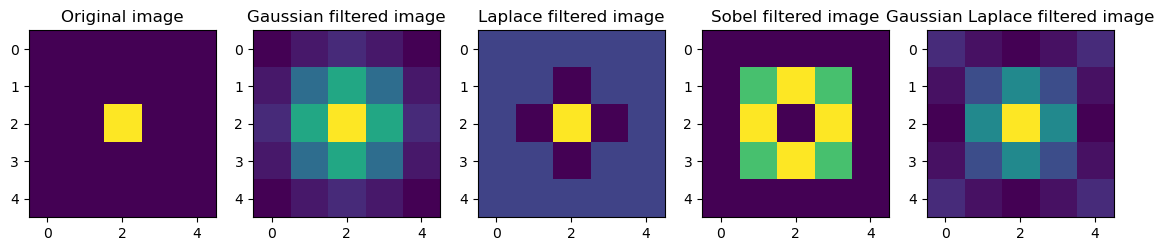

In [2]:
# apply a gaussian filter to the image
fig, ax = plt.subplots(1, 5, figsize=(14, 10))
image1 = np.zeros((5, 5))
image1[2, 2] = 1

ax[0].imshow(image1)
ax[0].set_title("Original image")

# lets apply a gaussian filter to the image
image2 = filters.gaussian(image1, sigma=1)
ax[1].imshow(image2)
ax[1].set_title("Gaussian filtered image")

# lets apply laplace filter to the image
image3 = filters.laplace(image1)
ax[2].imshow(image3)
ax[2].set_title("Laplace filtered image")

# lets apply sobel filter to the image
image4 = filters.sobel(image1)
ax[3].imshow(image4)
ax[3].set_title("Sobel filtered image")

# lets apply gaussian laplace filter to the image
def gaussian_laplace(image, sigma=1):
    gaussian_image = filters.gaussian(image, sigma=sigma)
    laplace_image = filters.laplace(gaussian_image)
    return laplace_image

image5 = gaussian_laplace(image1, sigma=1)
ax[4].imshow(image5)
ax[4].set_title("Gaussian Laplace filtered image")
plt.show()

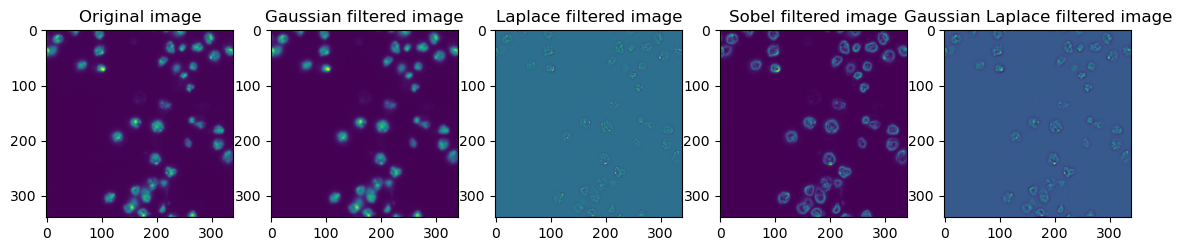

In [3]:
# apply a gaussian filter to the image
fig, ax = plt.subplots(1, 5, figsize=(14, 10))
image1 = plt.imread("data/BBBC007_batch/17P1_POS0013_D_1UL.tif")

ax[0].imshow(image1)
ax[0].set_title("Original image")

# lets apply a gaussian filter to the image
image2 = filters.gaussian(image1, sigma=1)
ax[1].imshow(image2)
ax[1].set_title("Gaussian filtered image")

# lets apply laplace filter to the image
image3 = filters.laplace(image1)
ax[2].imshow(image3)
ax[2].set_title("Laplace filtered image")

# lets apply sobel filter to the image
image4 = filters.sobel(image1)
ax[3].imshow(image4)
ax[3].set_title("Sobel filtered image")

# lets apply gaussian laplace filter to the image
def gaussian_laplace(image, sigma=1):
    gaussian_image = filters.gaussian(image, sigma=sigma)
    laplace_image = filters.laplace(gaussian_image)
    return laplace_image

image5 = gaussian_laplace(image1, sigma=1)
ax[4].imshow(image5)
ax[4].set_title("Gaussian Laplace filtered image")
plt.show()

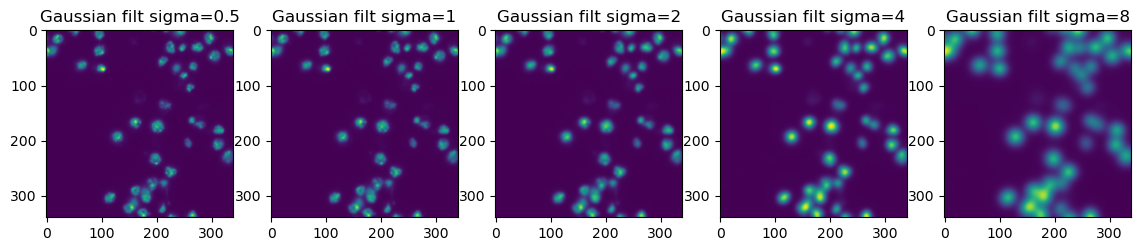

In [4]:
# lets use different stdanrd deviation to blur the image
sigma = [0.5, 1, 2, 4, 8]

fig, ax = plt.subplots(1, len(sigma), figsize=(14, 10))

for i, s in enumerate(sigma):
    image = filters.gaussian(image1, sigma=s)
    ax[i].imshow(image)
    ax[i].set_title(f"Gaussian filt sigma={s}")

plt.show()

Lets recreate the gaussian filtering convolution.
The formula for that looks as follows:

$$
G(x, y) = \frac{1}{2\pi\sigma^2} \cdot \exp\left( -\frac{x^2 + y^2}{2\sigma^2} \right)
$$

where x and y is the distance to the center of the pixel, and sigma is the standard deviation. The larger sigma the blurier the filtering.

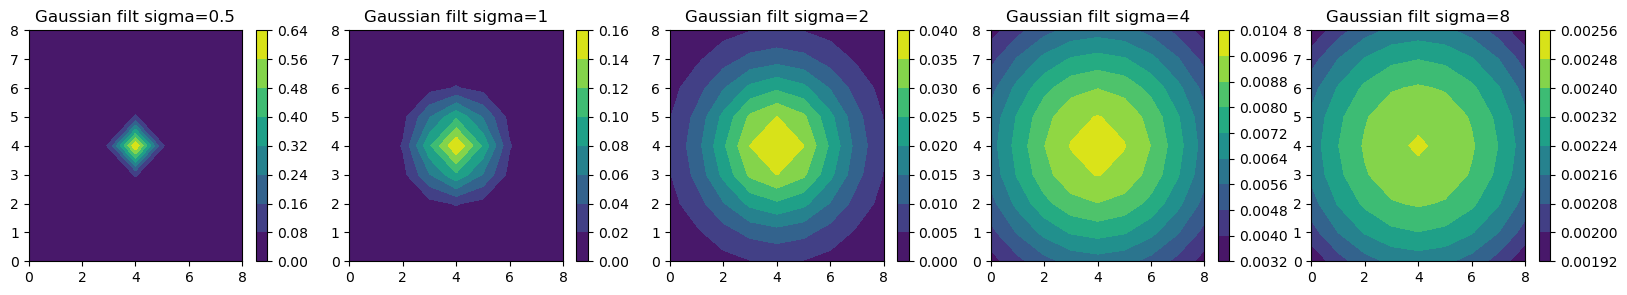

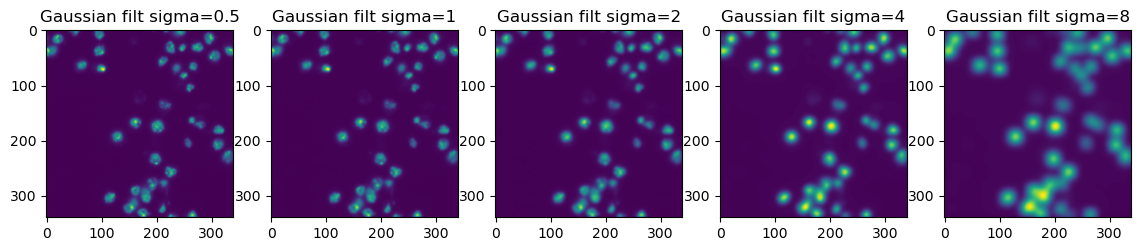

In [5]:
import numpy as np
from scipy.signal import convolve2d

def gaussian_kernel(size, sigma):
    x, y = np.meshgrid(np.arange(size), np.arange(size))
    center = size // 2
    distance = np.sqrt((x - center)**2 + (y - center)**2)
    kernel = np.exp(-(distance**2) / (2 * sigma**2))
    kernel = kernel / (2 * np.pi * sigma**2)
    return kernel

def gaussian_filter(image, kernel):
    return convolve2d(image, kernel, mode='same')

def apply_gaussian_filter(image, sigma, size):
    kernel = gaussian_kernel(size, sigma)
    return gaussian_filter(image, kernel)

sigma = [0.5, 1, 2, 4, 8]

# lets check out to see how the kernel changes with different sigma

sigma = [0.5, 1, 2, 4, 8]

fig, ax = plt.subplots(1, len(sigma), figsize=(20, 3))

for i, s in enumerate(sigma):
    kernel = gaussian_kernel(9, s)
    cs = ax[i].contourf(kernel)
    ax[i].set_title(f"Gaussian filt sigma={s}")
    fig.colorbar(cs)

plt.show()

fig, ax = plt.subplots(1, len(sigma), figsize=(14, 10))

for i, s in enumerate(sigma):
    image = apply_gaussian_filter(image1, sigma=s, size=31)
    ax[i].imshow(image)
    ax[i].set_title(f"Gaussian filt sigma={s}")

plt.show()

## Filter overview

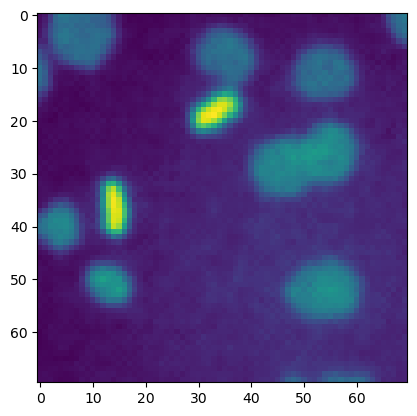

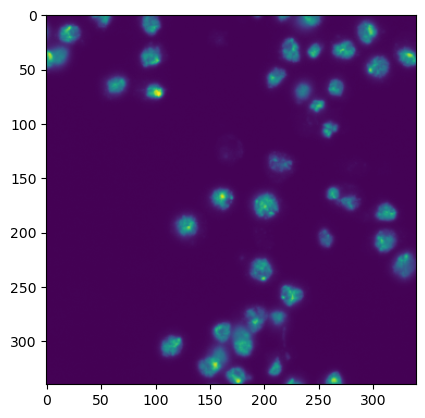

In [6]:
image3 = plt.imread('data/mitosis_mod.tif').astype(float)
denoised_mean = filters.rank.mean(image3.astype(np.uint8), morphology.disk(1))
plt.imshow(denoised_mean)
plt.show()
plt.imshow(image1)

# Noise removal filters

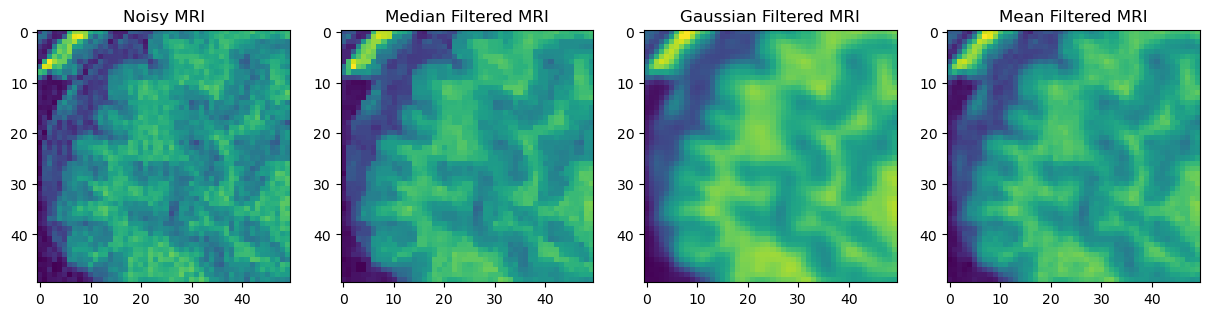

In [ ]:
noisy_mri = imread('data/Haase_MRT_tfl3d1.tif')[90]
noisy_mri_zoom = noisy_mri[50:100, 50:100]

median_filt_mri = filters.median(noisy_mri, morphology.disk(1))
median_filt_mri_zoom = median_filt_mri[50:100, 50:100]
mean_filt_mri = filters.rank.mean(noisy_mri, morphology.disk(1))
mean_filt_mri_zoom = mean_filt_mri[50:100, 50:100]
gaussian_filt_mri = filters.gaussian(noisy_mri, sigma=1)
gaussian_filt_mri_zoom = gaussian_filt_mri[50:100, 50:100]

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(noisy_mri_zoom)
ax[0].set_title('Noisy MRI')
ax[1].imshow(median_filt_mri_zoom)
ax[1].set_title('Median Filtered MRI')
ax[2].imshow(gaussian_filt_mri_zoom)
ax[2].set_title('Gaussian Filtered MRI')
ax[3].imshow(mean_filt_mri_zoom)
ax[3].set_title('Mean Filtered MRI')
plt.show()

# Background removal filters

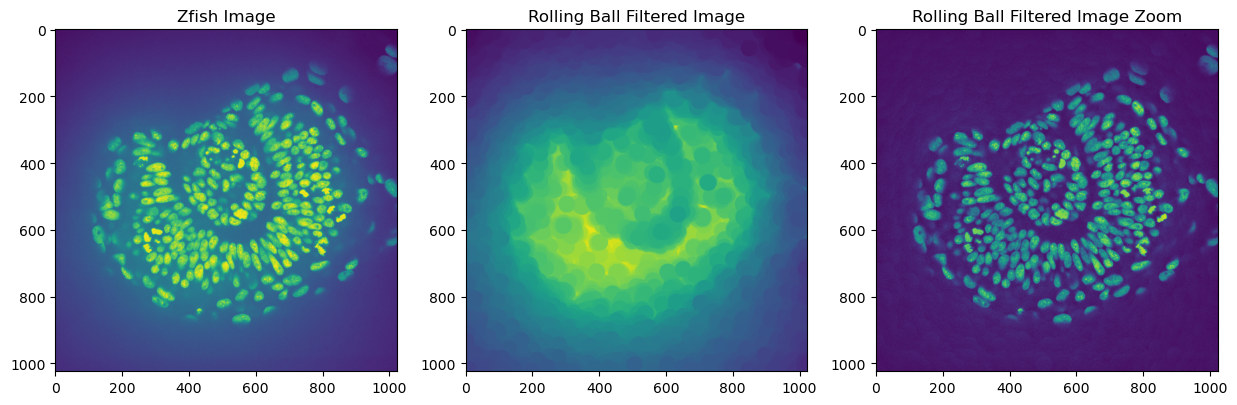

In [ ]:
zfish_image = imread('data/zfish_eye.tif')[:,:,0]
rolling_ball_filtered_image = rolling_ball(zfish_image, radius=25)
rolling_ball_filtered_image_zoom = zfish_image - rolling_ball_filtered_image

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(zfish_image)
ax[0].set_title('Zfish Image')
ax[1].imshow(rolling_ball_filtered_image)
ax[1].set_title('Rolling Ball Filtered Image')
ax[2].imshow(rolling_ball_filtered_image_zoom)
ax[2].set_title('Rolling Ball Filtered Image Zoom')
plt.show()


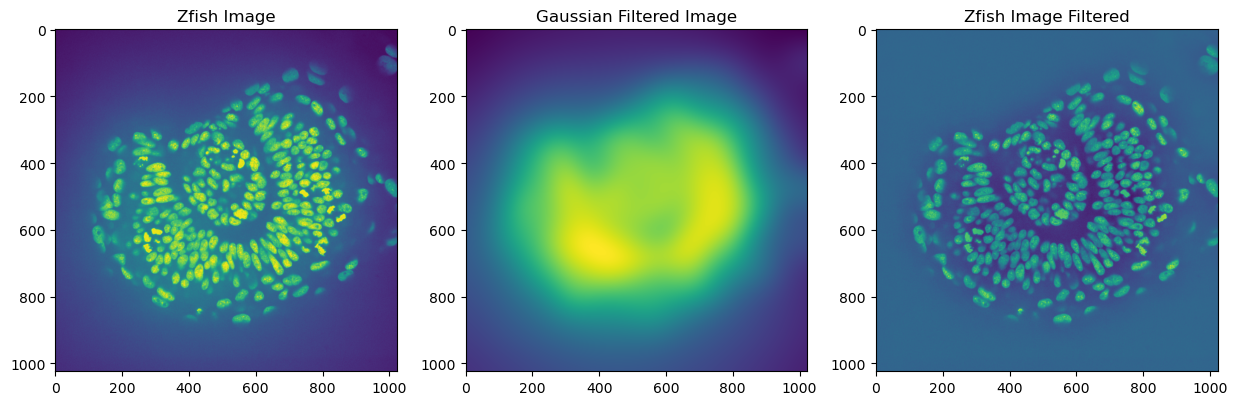

In [30]:
# perform remove guassian filter

gaussian_filt_image = filters.gaussian(zfish_image, sigma=50, preserve_range=True)
zfish_image_filt = zfish_image - gaussian_filt_image

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(zfish_image)
ax[0].set_title('Zfish Image')
ax[1].imshow(gaussian_filt_image)
ax[1].set_title('Gaussian Filtered Image')
ax[2].imshow(zfish_image_filt)
ax[2].set_title('Zfish Image Filtered')
plt.show()


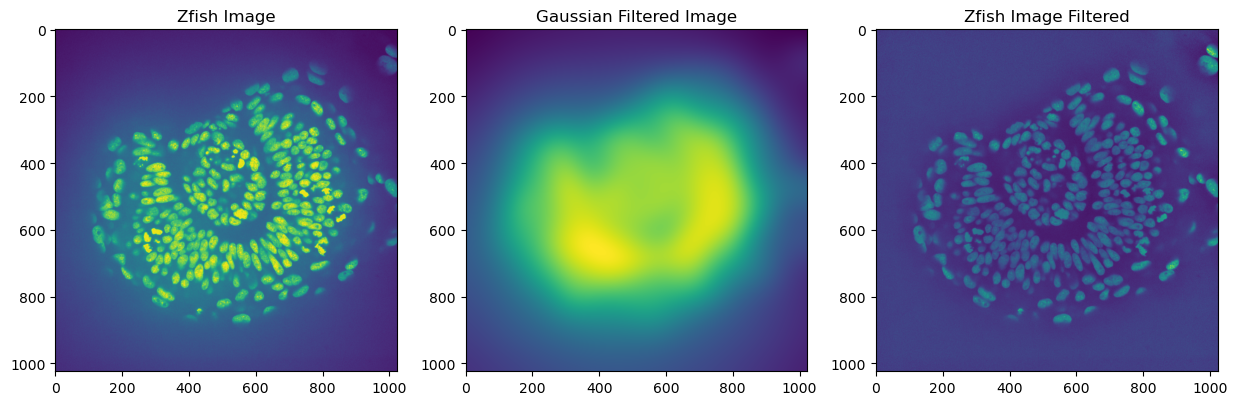

In [31]:
# divide by the background to make the nuclei more prominent

zfish_image_filt = zfish_image / gaussian_filt_image

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(zfish_image)
ax[0].set_title('Zfish Image')
ax[1].imshow(gaussian_filt_image)
ax[1].set_title('Gaussian Filtered Image')
ax[2].imshow(zfish_image_filt)
ax[2].set_title('Zfish Image Filtered')
plt.show()

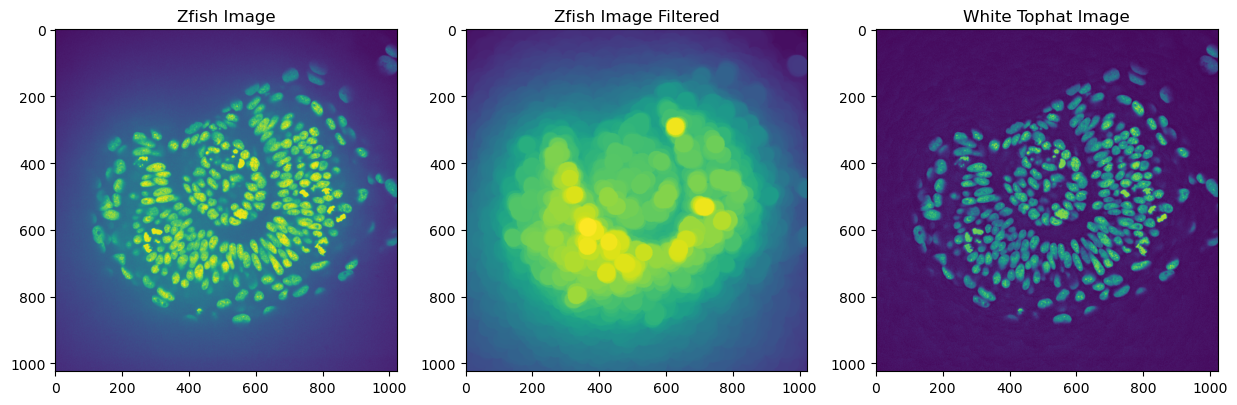

In [40]:
# remove background using tophat

white_tophat_image   = white_tophat(zfish_image, morphology.disk(25))
zfish_image_filt = zfish_image - white_tophat_image

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(zfish_image)
ax[0].set_title('Zfish Image')
ax[1].imshow(zfish_image_filt)
ax[1].set_title('Zfish Image Filtered')
ax[2].imshow(white_tophat_image)
ax[2].set_title('White Tophat Image')

plt.show()

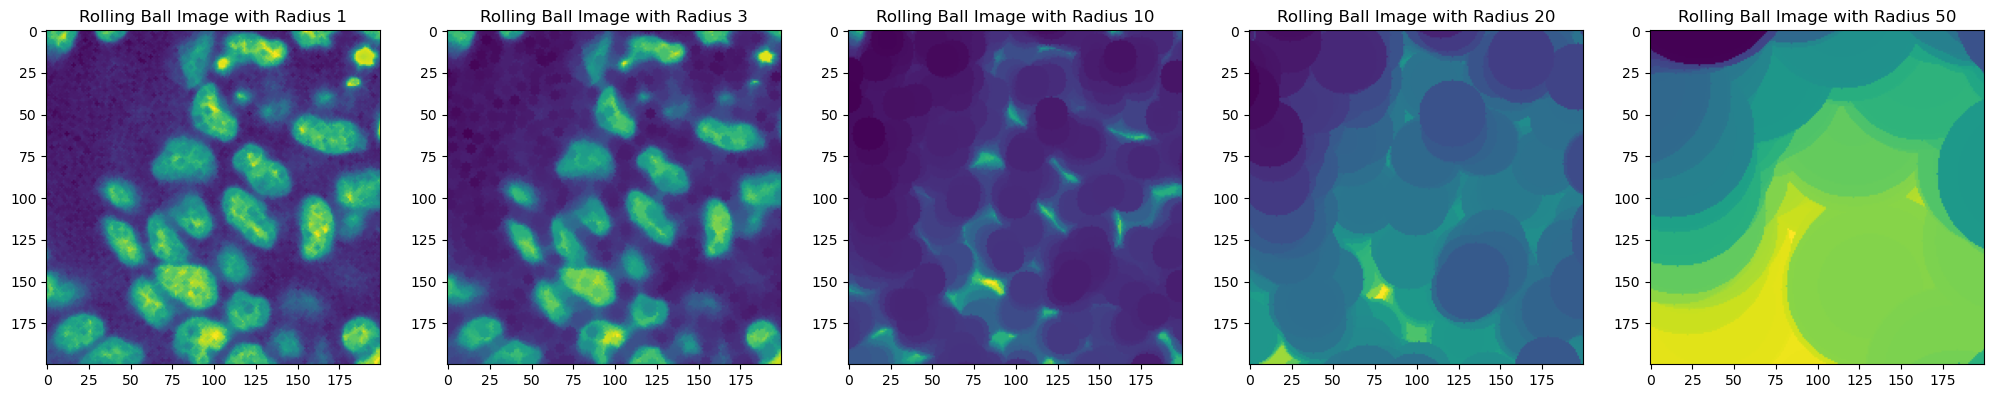

In [46]:
# use different radii to remove the background optimally

radii = [1, 3, 10, 20, 50]

fig, ax = plt.subplots(1, len(radii), figsize=(5*len(radii), 5))
for i, radius in enumerate(radii):
    rolling_ball_image = rolling_ball(zfish_image, radius=radius)
    zfish_image_filt = zfish_image - rolling_ball_image
    ax[i].imshow(rolling_ball_image[350:550, 350:550])
    ax[i].set_title(f'Rolling Ball Image with Radius {radius}')
plt.show()

Text(0.5, 1.0, 'gaussian enhanced')

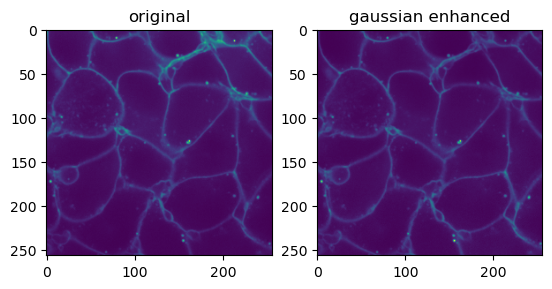

In [48]:
# divide the gaussian filter to enhance the membrane 

image = imread('data/membranes_2d.tif')
gaussian_background = filters.gaussian(image, sigma=30)
gaussian_enhanced_image = image/gaussian_background

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[0].set_title("original")
ax[1].imshow(gaussian_enhanced_image)
ax[1].set_title("gaussian enhanced")